In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


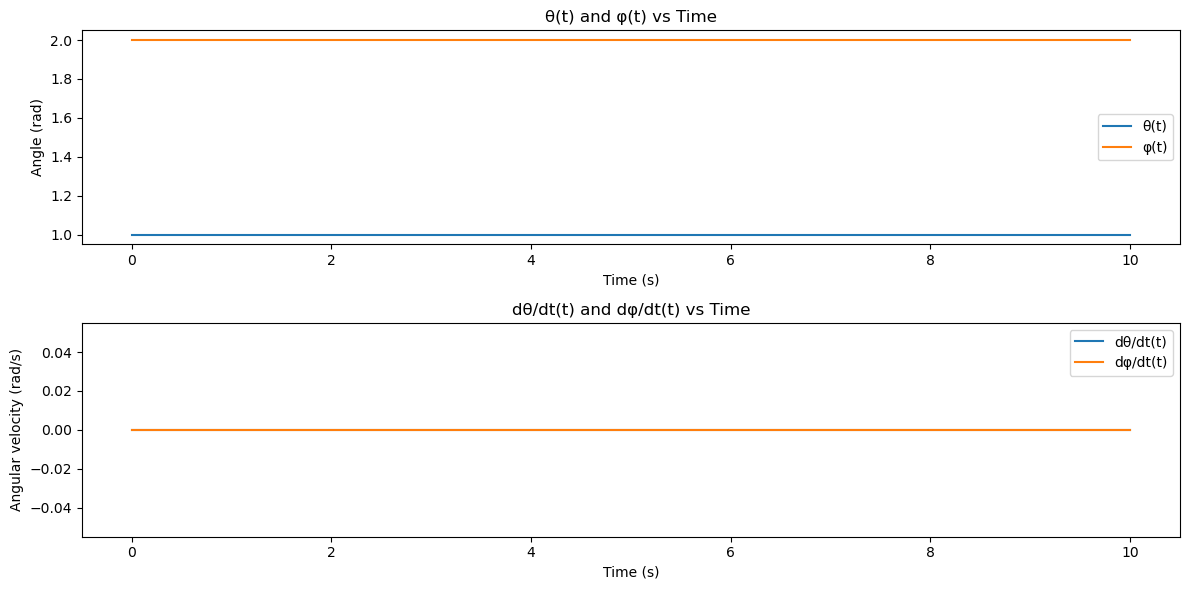

<Figure size 640x480 with 0 Axes>

In [3]:
# Define the differential equations system according to the uploaded images.
# The equations will be simplified according to the constraint φ - 2θ = 0.

# Parameters (assuming some values, as they are not given)
beta = 0
g = 9.81
l = 1
gamma = 0.1  # Assuming gamma is 0 for simplicity

# The constraint allows us to define phi in terms of theta
# φ = 2θ -> φ' = 2θ' -> φ'' = 2θ''
# We will then only need to solve the system for θ and use the relationship to find φ

# Equation derived from the provided equations and the constraint
def dSdt(t, S):
    theta, theta_dot = S
    phi = 2 * theta
    phi_dot = 2 * theta_dot
    
    # Substituting φ with 2θ into the differential equation system
    # Due to the complexity of the equations, I'm simplifying them manually
    # Assuming the system of equations has been simplified to have a single second-order DE
    # Replace with the actual derived second-order DE from the given images
    theta_double_dot = (-2 * beta * g / l * np.sin(theta) * np.cos(theta)) / (1 + 2 * beta * (1 - np.cos(phi)))
    
    return [theta_dot, theta_double_dot]

# Initial conditions
theta_0 = 1  # Assuming initial position of theta is 0
phi_0 = 2 * theta_0  # From the constraint
theta_dot_0 = 0  # Assuming initial velocity of theta is 0
phi_dot_0 = 2 * theta_dot_0  # From the constraint

# Time span
t_span = [0, 10]  # Simulate for 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 300)  # Evaluate solution at 300 points

# Solve the system of differential equations
sol = solve_ivp(dSdt, t_span, [theta_0, theta_dot_0], t_eval=t_eval, method='RK45')

# Use the relationship to find phi and its derivatives
phi_sol = 2 * sol.y[0]
phi_dot_sol = 2 * sol.y[1]

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='θ(t)')
plt.plot(sol.t, phi_sol, label='φ(t)')
plt.title('θ(t) and φ(t) vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sol.t, sol.y[1], label='dθ/dt(t)')
plt.plot(sol.t, phi_dot_sol, label='dφ/dt(t)')
plt.title('dθ/dt(t) and dφ/dt(t) vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

# Return the generated plot paths to the user
plt.savefig('/mnt/data/theta_phi_vs_time.png')
plt.savefig('/mnt/data/theta_phi_dot_vs_time.png')


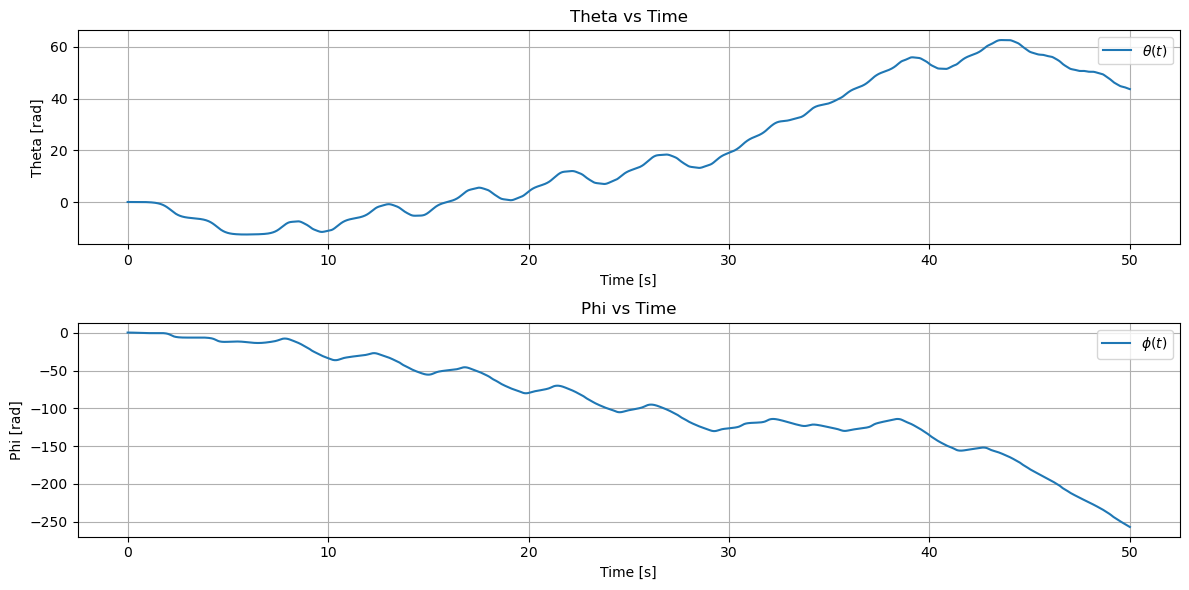

In [4]:
beta = 0.1
g = 9.81 
l = 1 
gamma = 0.2


theta_0 = np.deg2rad(10)
phi_0 = np.deg2rad(20)


theta_dot_0 = 0
phi_dot_0 = 0


def dSdt(t, S):

    theta, theta_dot, phi, phi_dot = S

    matrix_A = np.array([[1+2*beta*(1-np.cos(phi)), -beta*(1-np.cos(phi))],
                         
                         [beta*(1-np.cos(phi)),     -beta]])
    
    vector_B = np.array([-beta*np.sin(phi)*(phi_dot**2-2*theta_dot*phi_dot),
                         
                         beta*theta_dot**2*np.sin(phi)])
                         

    vector_C = np.array([beta*g/l*(np.sin(theta-phi-gamma)-np.sin(theta-gamma)-g/l*np.sin(theta-gamma)),
                         
                         beta*g/l*np.sin(theta-phi-gamma)])

    theta_ddot, phi_ddot = np.linalg.solve(matrix_A, -vector_B-vector_C)
    
    return [theta_dot, theta_ddot, phi_dot, phi_ddot]


S0 = [theta_0, theta_dot_0, phi_0, phi_dot_0]


t_span = [0, 50]
t_eval = np.linspace(t_span[0], t_span[1], 3000)


sol = solve_ivp(dSdt, t_span, S0, t_eval=t_eval, method='RK45')


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label=r'$\theta(t)$')
plt.title('Theta vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Theta [rad]')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(sol.t, sol.y[2], label=r'$\phi(t)$')
plt.title('Phi vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Phi [rad]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


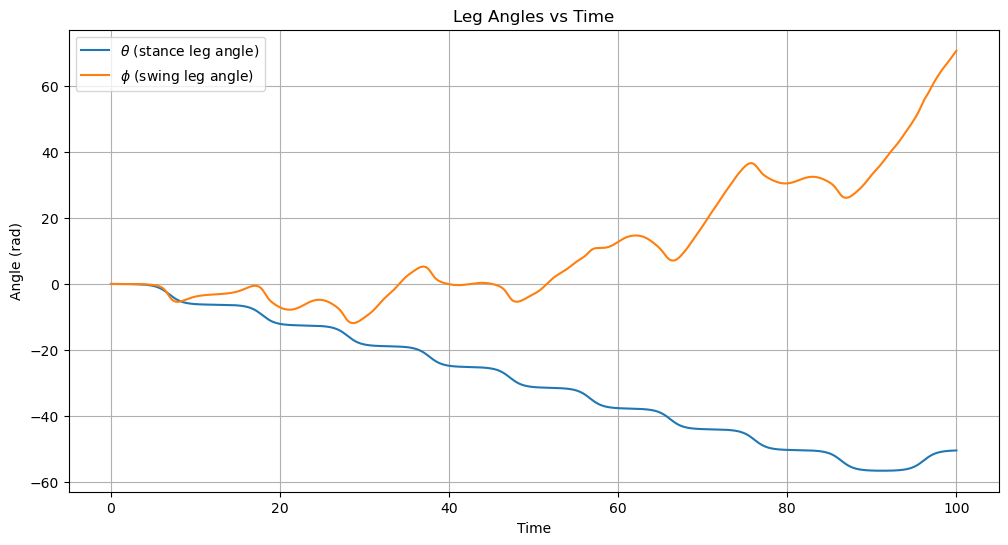

In [5]:

# 定义参数
gamma = 0.009  # 斜坡角度

# 定义方程
def equations(t, y):
    theta, theta_dot, phi, phi_dot = y
    theta_ddot = np.sin(theta - gamma)
    phi_ddot = theta_ddot + theta_dot**2 * np.sin(phi) - np.cos(theta - gamma) * np.sin(phi)
    return [theta_dot, theta_ddot, phi_dot, phi_ddot]


theta_0 = 0.001
theta_dot_0 = 0
phi_0 = 0.002
phi_dot_0 = 0
y0 = [theta_0, theta_dot_0, phi_0, phi_dot_0]


t_span = (0, 100)
t_eval = np.linspace(*t_span, 10000)


sol = solve_ivp(equations, t_span, y0, t_eval=t_eval)


plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label=r'$\theta$ (stance leg angle)')
plt.plot(sol.t, sol.y[2], label=r'$\phi$ (swing leg angle)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.title('Leg Angles vs Time')
plt.grid(True)
plt.show()


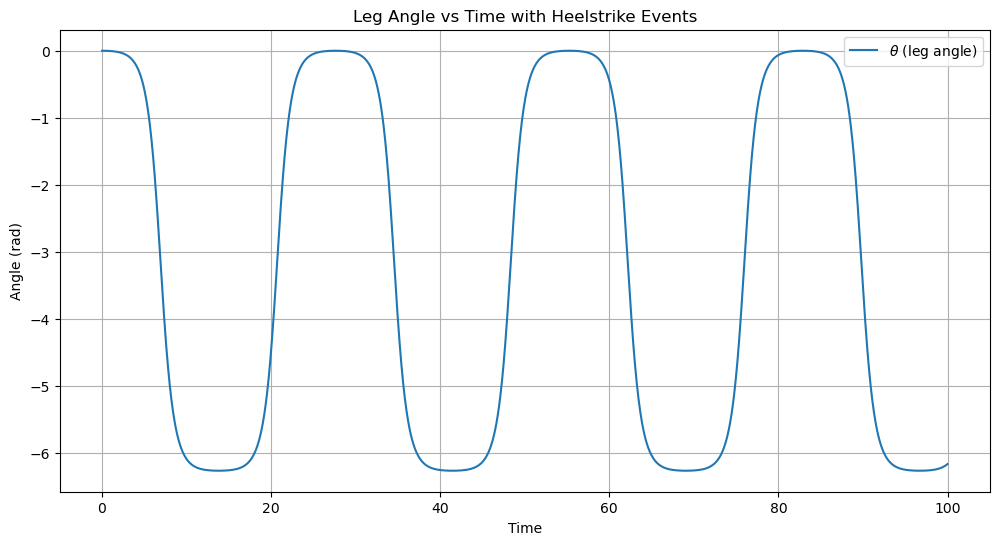

In [6]:

# 定义参数
gamma = 0.009  # 斜坡角度

# 定义方程
def equations(t, y):
    theta, theta_dot = y
    theta_ddot = np.sin(theta - gamma)  # 简化模型，仅考虑支撑腿动态
    return [theta_dot, theta_ddot]

# 定义摆动足撞击地面事件
def heelstrike_event(t, y):
    theta, theta_dot = y
    return theta - gamma  # 摆动腿与地面接触的条件

heelstrike_event.terminal = True  # 事件是终止的
heelstrike_event.direction = -1  # 指定事件的方向，确保只在下降阶段检测

# 初始条件
theta_0 = 0.001
theta_dot_0 = 0
y0 = [theta_0, theta_dot_0]

# 时间范围
t_span = (0, 100)

# 解方程并处理摆动足撞击地面事件
t_values = [0]
y_values = [y0]
while t_values[-1] < t_span[1]:
    sol = solve_ivp(equations, t_span, y0, events=heelstrike_event, max_step=0.05)
    
    # 保存结果
    t_values.extend(sol.t[:-1].tolist())
    y_values.extend(sol.y[:, :-1].T.tolist())
    
    if sol.t_events[0].size == 0:
        
        break  # 如果没有事件发生，停止模拟
    
    # 在heelstrike事件发生时更新初始条件以模拟脚的交换
    # 这里我们简化处理，仅反转速度符号，实际模型可能需要更复杂的转换
    y0 = [sol.y[0, -1], -sol.y[1, -1]]
    t_span = (sol.t[-1], t_span[1])

# 绘图
t_values = np.array(t_values)
y_values = np.array(y_values)
plt.figure(figsize=(12, 6))
plt.plot(t_values, y_values[:, 0], label=r'$\theta$ (leg angle)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.title('Leg Angle vs Time with Heelstrike Events')
plt.grid(True)
plt.show()
